In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import ete3
from ete3 import AttrFace, NodeStyle, faces
from IPython.display import Image, display, clear_output
import time
plt.style.use('seaborn')

In [75]:
# Read file for DUDC

def read_file_dudc(filename, dim=2):
    with open(filename, 'r') as f:
        lines = f.readlines()
        
    P = []
    Q = []

    points = False
    disks = False
    for line in lines:
        if line.startswith('\n'): continue
        if line.startswith("%POINTS"):
            points = True
            disks = False
        elif line.startswith('%DISKS'):
            points = False
            disks = True
        elif points:
            arr = line.replace('\n', '').replace('(', '').replace(')', '').split(',')
            P.append((float(arr[0]), float(arr[1])))
        elif disks:
            arr = line.replace('\n', '').replace('(', '').replace(')', '').split(',')
            if dim == 2:
                Q.append(Disk(float(arr[0]), float(arr[1])))
            elif dim == 1:
                interval = (float(arr[0]), float(arr[1]))
                Q.append(interval)
        else:
            print('Please specify %POINTS and %DISKS to distinguish the sets of pairs of integers.')
            return

            
    return P, Q
    
    
P, Q = read_file_dudc('./instances/dudc.txt', dim=2)
print(P)
print(Q)

[(1.5, 2.5), (3.5, 3.5), (4.5, 2.5), (4.5, 3.5), (5.5, 3.5)]
[d1, d2, d3, d4, d5]


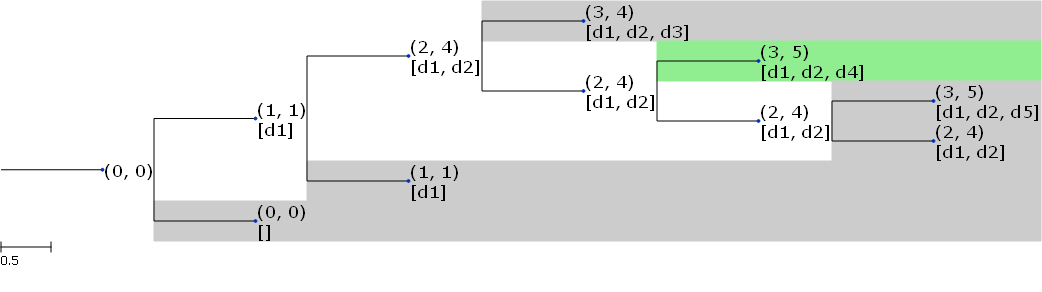

Legend : 
	Green : solution (added from parameters)
	Grey : closed branch


In [73]:
def show_tree(root, sol_node=None):
    """ Displays branch-and-bound tree

    Parameters:
    root (BBTree): Branch-and-bound tree to display
   """
    ete_tree, ts = BBTree2ete(root, sol_node)
    img = ete_tree.render("%%inline", tree_style=ts)
    display(img)
    print("Legend : ")
    print("\tGreen : solution (added from parameters)")
    print("\tGrey : closed branch")
    
show_tree(root, sol_node=sol_node)